In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data=pd.read_csv("test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

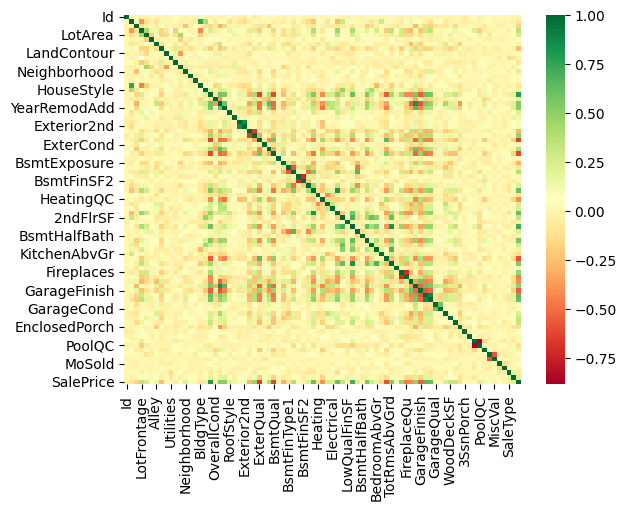

In [5]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i])

sns.heatmap(df.corr(), cmap="RdYlGn")

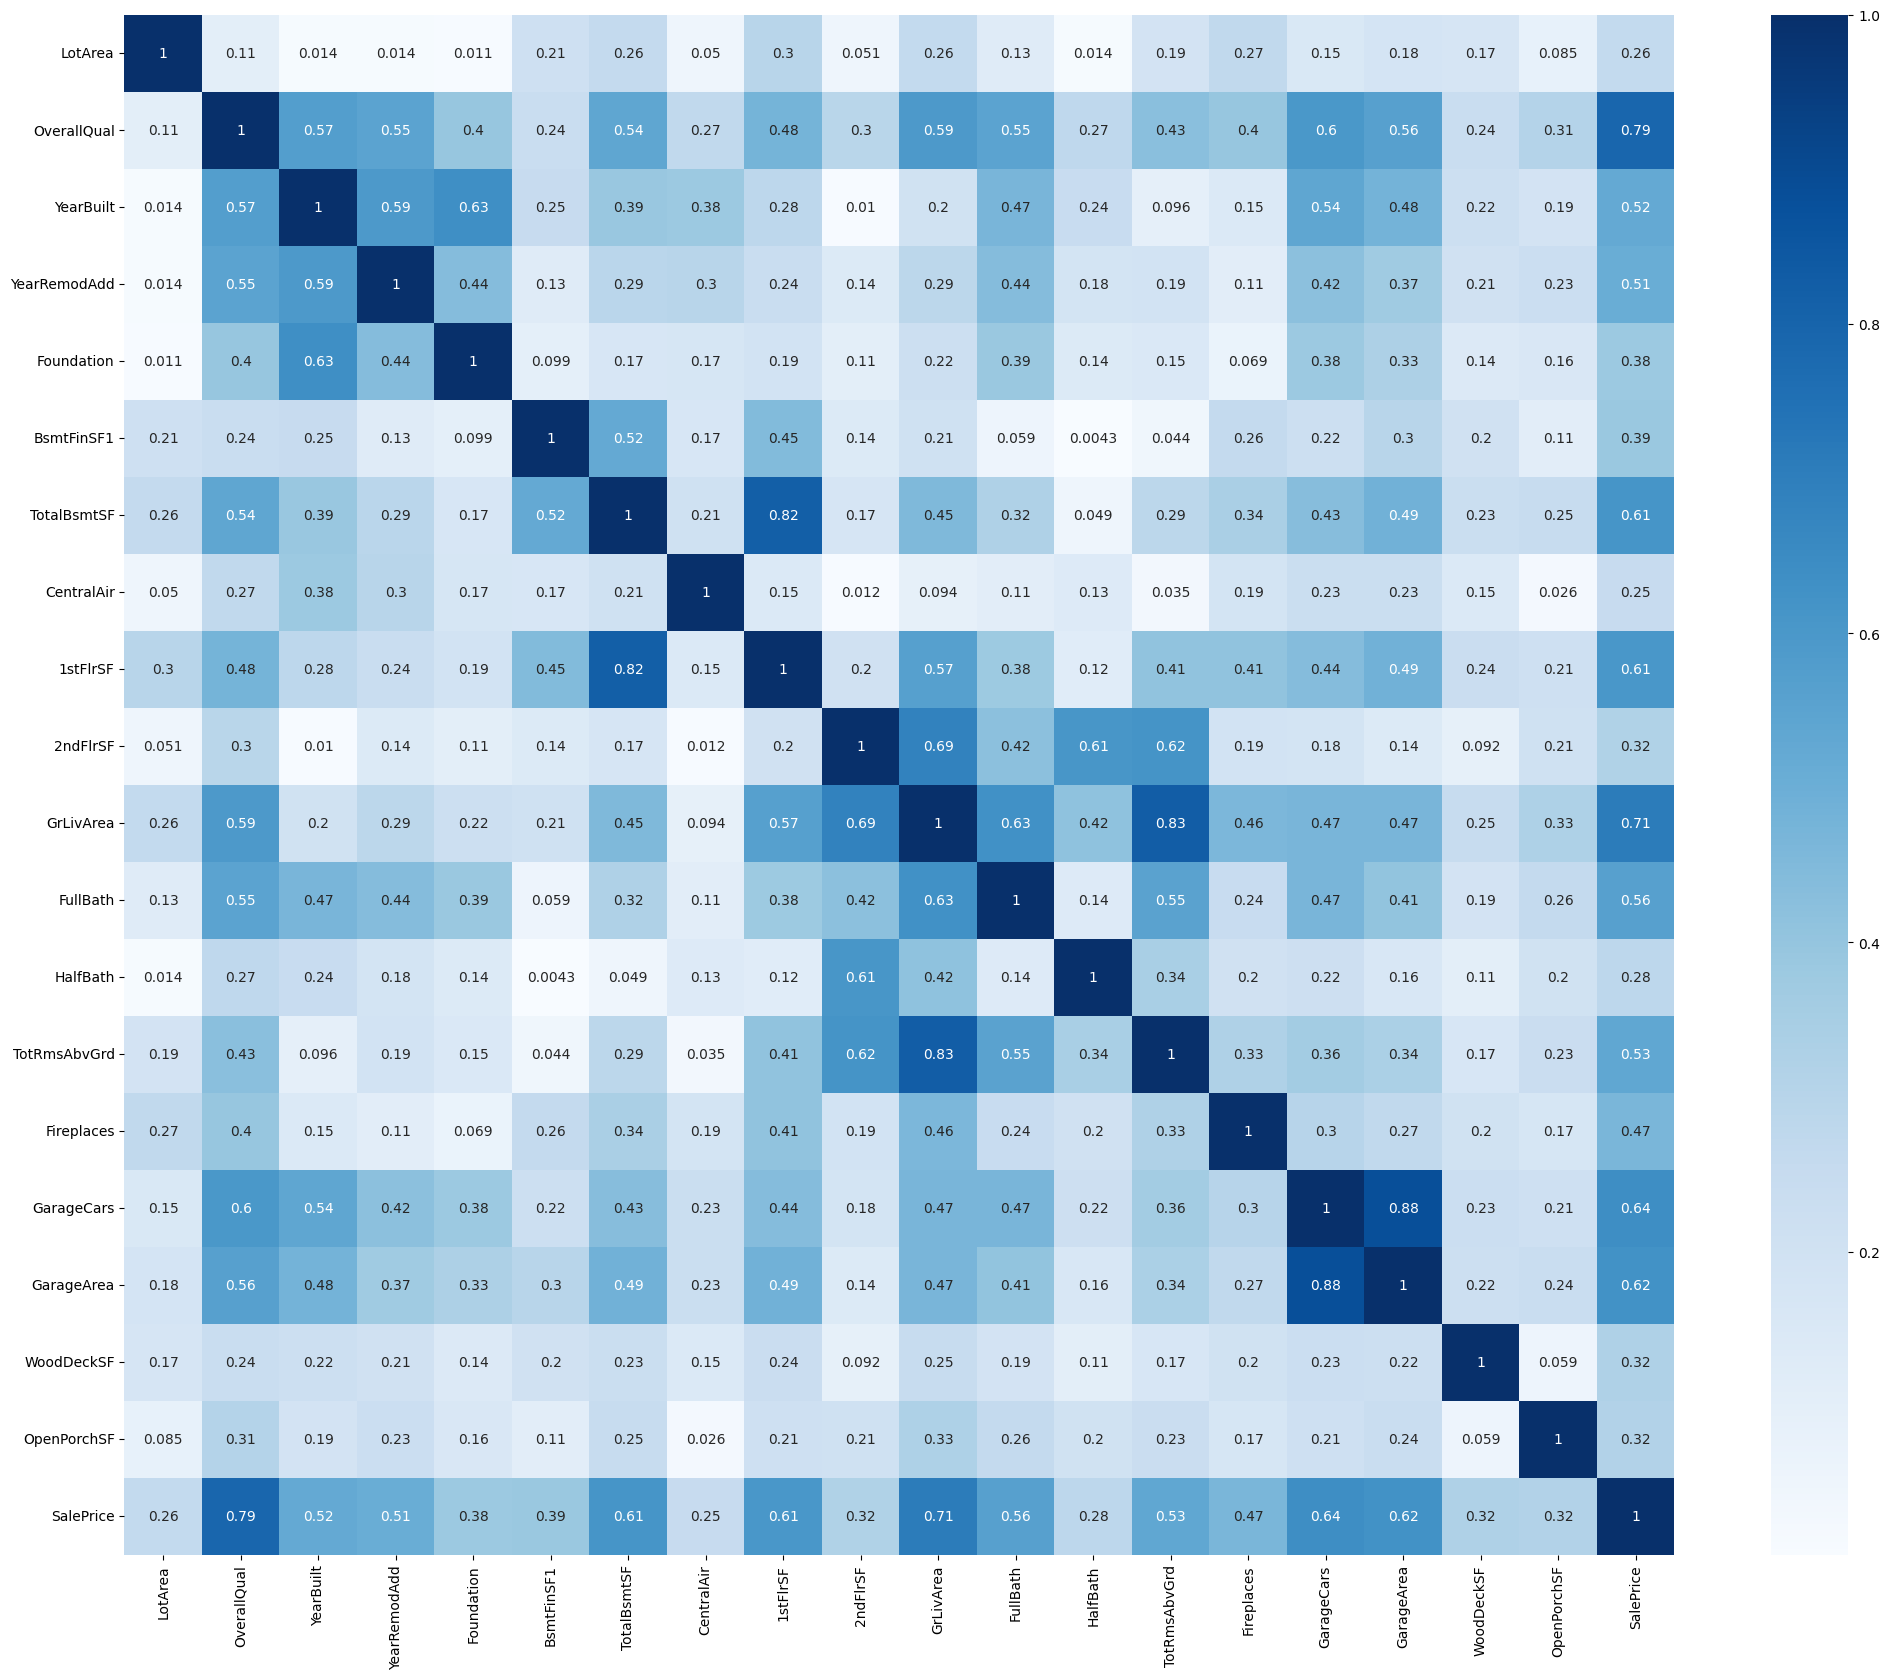

,LotArea,OverallQual,YearBuilt,YearRemodAdd,Foundation,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,7,2003,2003,2,706,856,1,856,854,1710,2,1,8,0,2,548,0,61,208500
1,9600,6,1976,1976,1,978,1262,1,1262,0,1262,2,0,6,1,2,460,298,0,181500
2,11250,7,2001,2002,2,486,920,1,920,866,1786,2,1,6,1,2,608,0,42,223500
3,9550,7,1915,1970,0,216,756,1,961,756,1717,1,0,7,1,3,642,0,35,140000
4,14260,8,2000,2000,2,655,1145,1,1145,1053,2198,2,1,9,1,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,2,0,953,1,953,694,1647,2,1,7,1,2,460,0,40,175000
1456,13175,6,1978,1988,1,790,1542,1,2073,0,2073,2,0,7,2,2,500,349,0,210000
1457,9042,7,1941,2006,4,275,1152,1,1188,1152,2340,2,0,9,2,1,252,0,60,266500
1458,9717,5,1950,1996,1,49,1078,1,1078,0,1078,1,0,5,0,1,240,366,0,142125


In [6]:
import numpy as np


subset_corr_input_features = []
for column in df.columns:
    if np.corrcoef(df['SalePrice'],df[column])[0,1]>0.25:
        subset_corr_input_features.append(column)

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(np.abs(df[subset_corr_input_features].corr()), annot = True,
cmap="Blues")
plt.show()

for i in subset_corr_input_features:
    new_df = df[subset_corr_input_features]
new_df

In [7]:
df = df.dropna()
y = df["SalePrice"]
X = df.drop(['SalePrice'], axis=1)

In [8]:
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

In [9]:
from sklearn.metrics import r2_score


score = r2_score(y, predictions)
print(score)

0.8563320801067156


In [10]:
print(predictions)
print(y)

[217592.41177727 205280.02936677 217771.02285753 ... 236737.34089139
 147921.18339463 158806.07151129]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64


In [11]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   MSZoning       1121 non-null   int32  
 3   LotFrontage    1121 non-null   float64
 4   LotArea        1121 non-null   int64  
 5   Street         1121 non-null   int32  
 6   Alley          1121 non-null   int32  
 7   LotShape       1121 non-null   int32  
 8   LandContour    1121 non-null   int32  
 9   Utilities      1121 non-null   int32  
 10  LotConfig      1121 non-null   int32  
 11  LandSlope      1121 non-null   int32  
 12  Neighborhood   1121 non-null   int32  
 13  Condition1     1121 non-null   int32  
 14  Condition2     1121 non-null   int32  
 15  BldgType       1121 non-null   int32  
 16  HouseStyle     1121 non-null   int32  
 17  OverallQual    1121 non-null   int64  
 18  OverallCond  

In [13]:
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
numerical_ix = numerical_ix.drop(["SalePrice"])
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

column_transformer = ColumnTransformer(
        (OneHotEncoder(), categorical_ix),
        (LabelEncoder(), numerical_ix), remainder='passthrough'
    )

TypeError: ColumnTransformer.__init__() takes 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given